In [1]:
__author__ = "Ehsaneddin Asgari"
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Ehsaneddin Asgari"
__email__ = "asgari@berkeley.edu or ehsaneddin.asgari@helmholtz-hzi.de"
__project__ = "LLP - MicroPheno"
__website__ = "https://llp.berkeley.edu/micropheno/"
import sys
sys.path.append('../')
from bootstrapping.bootstrapping import BootStrapping
from utility.file_utility import FileUtility

# Body-site dataset

## 1. Reading fasta files

In [21]:
### getting a list of fasta files need to be read from directory
files=FileUtility.recursive_glob('../data_config/bodysites/','*.txt')
list_of_files=[]
for file in files:
    list_of_files+=FileUtility.load_list(file)    
list_of_files=[x+'.fsa' for x in list_of_files]

### reading fasta files
# return: list of fasta files, and a dic to map file to index
# load only only_files
fasta_files, mapping = FileUtility.read_fasta_directory('../../../datasets/deepbio/microbiome/hmb_data/','fsa',only_files=list_of_files)


## 2. Creating bootstrapping object

In [3]:
## create a bootstrapping object with the parameter explaind in the paper
BS=BootStrapping(fasta_files,'body-site/', seqtype='fsa' ,sampling_sizes=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
                 n_resamples=10, M=10)

## 3. Bootstrapping for different k-mers

In [7]:
## add k-mer samplings
for k in [3,4,5,6,7,8]:
    print(k,'-mer bootstrapping..')
    BS.add_kmer_sampling(k)

3
 sampling size  10  is started ...
 sampling size  10  is completed.
 sampling size  20  is started ...
 sampling size  20  is completed.
 sampling size  50  is started ...
 sampling size  50  is completed.
 sampling size  100  is started ...
 sampling size  100  is completed.
 sampling size  200  is started ...
 sampling size  200  is completed.
 sampling size  500  is started ...
 sampling size  500  is completed.
 sampling size  1000  is started ...
 sampling size  1000  is completed.
 sampling size  2000  is started ...
 sampling size  2000  is completed.
 sampling size  5000  is started ...
 sampling size  5000  is completed.
 sampling size  10000  is started ...
 sampling size  10000  is completed.
4
 sampling size  10  is started ...
 sampling size  10  is completed.
 sampling size  20  is started ...
 sampling size  20  is completed.
 sampling size  50  is started ...
 sampling size  50  is completed.
 sampling size  100  is started ...
 sampling size  100  is completed.
 sam

## 4. Plotting

Populating the interactive namespace from numpy and matplotlib


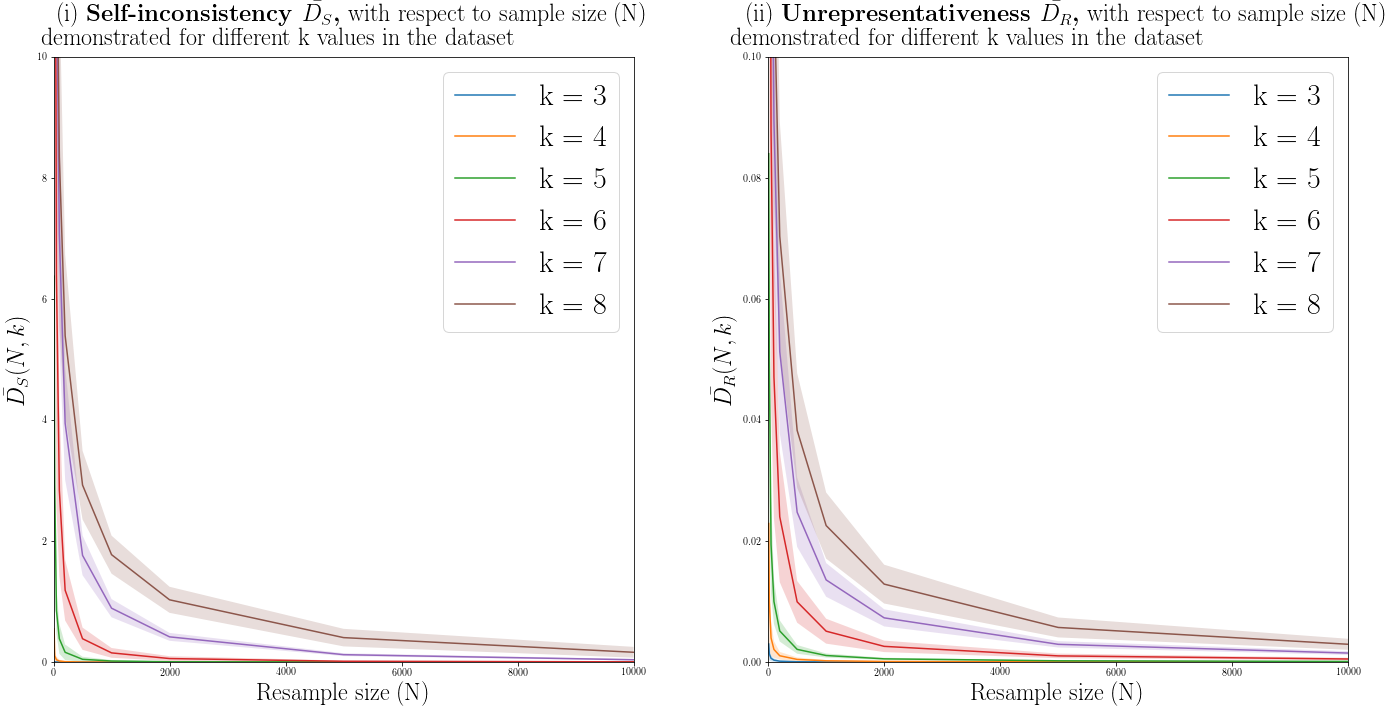

In [11]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 

BS.plotting('results_bootstrapping_body-site','body-site')

# 5. Saving

In [8]:
BS.save_me('body-site_bootstrapping')

# 6. Loading 

In [12]:
## create a bootstrapping object with the parameter explaind in the paper
BS2=BootStrapping.load_precalculated('../../bio_cpe_data/results/datasetting1/results_bootstrapping_setting2.pickle')

In [13]:
BS1=BootStrapping.load_precalculated('../../bio_cpe_data/results/datasetting1/results_bootstrapping_setting1.pickle')

In [15]:
BS1.D_S==BS2.D_S

False

In [11]:
import _pickle as pickle

f = open('../../bio_cpe_data/results/datasetting2/setting2.pickle', 'wb')
pickle.dump(BS.__dict__, f, 2)
f.close()

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '../bio_cpe_data/results/datasetting1/results_bootstrapping_body-site.pdf'

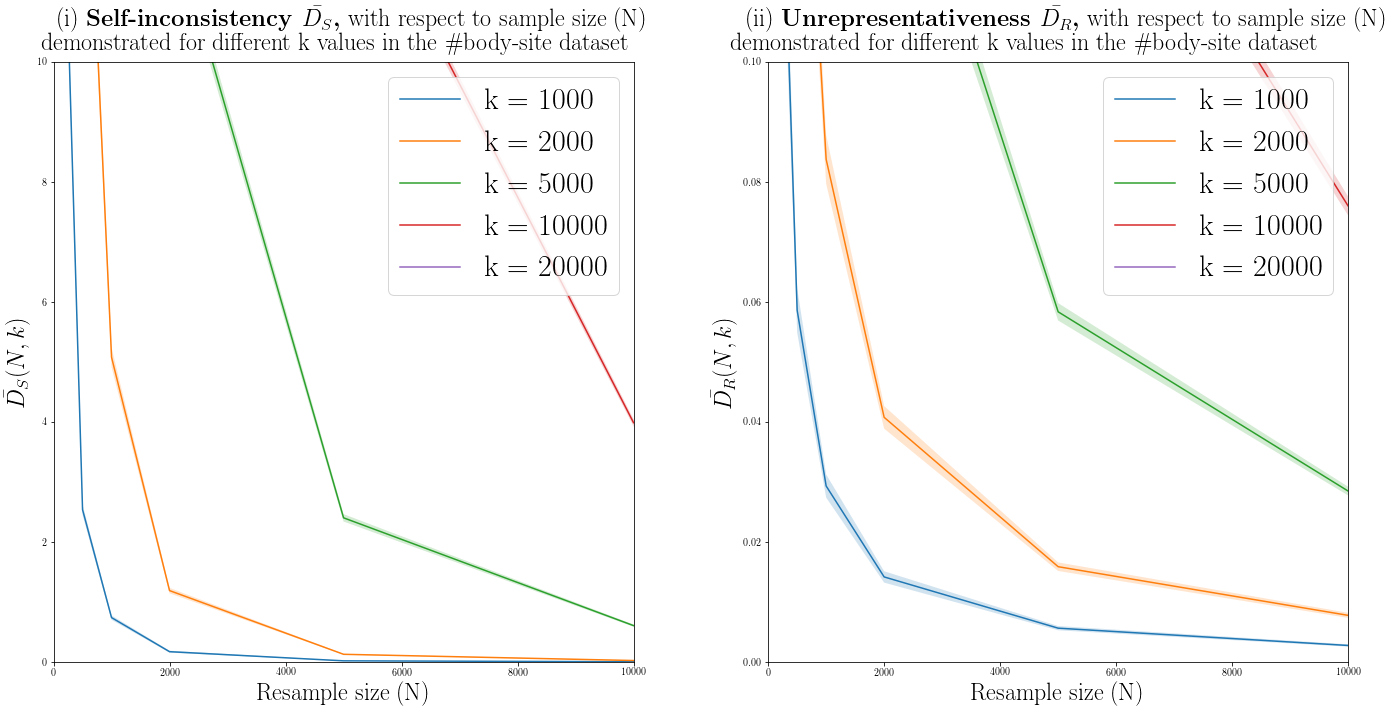

In [6]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline


BS.plotting('results_bootstrapping_body-site','\#body-site')

# Crohn's disease dataset

Similar step can be taken to produce the k-mer plots. Or you can just load the previously produced the results:

In [37]:
BS=BootStrapping.load_precalculated('../../MicroPheno_datasets/crohns-disease/results_bootstrapping_crohns-disease.pickle')

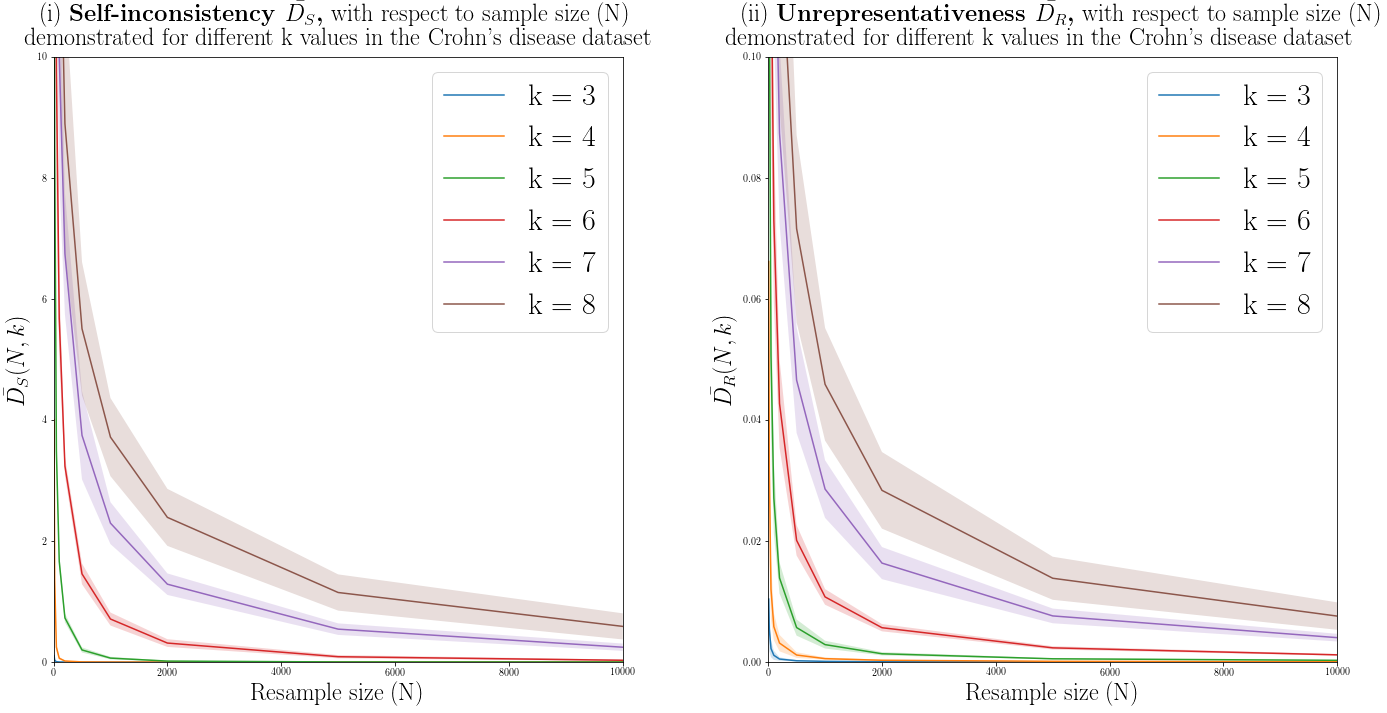

In [38]:
BS.plotting('results_bootstrapping_crohns-disease','Crohn\'s disease')